# Diabetes diagnosing 

## Context

***This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.***

## Content

***The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.***

*We can learn from the data found on UCI Machine Learning Repository which contains data on female patients at least 21 years old of Pima Indian heritage.*

*We have 768 instances and the following 8 attributes:*

- Number of times pregnant (preg)
- Plasma glucose concentration a 2 hours in an oral glucose tolerance test (plas)
- Diastolic blood pressure in mm Hg (pres)
- Triceps skin fold thickness in mm (skin)
- 2-Hour serum insulin in mu U/ml (insu)
- Body mass index measured as weight in kg/(height in m)^2 (mass)
- Diabetes pedigree function (pedi)
- Age in years (age)

*A particularly interesting attribute used in the study was the Diabetes Pedigree Function, pedi. It provided some data on diabetes mellitus history in relatives and the genetic relationship of those relatives to the patient. This measure of genetic influence gave us an idea of the hereditary risk one might have with the onset of diabetes mellitus. Based on observations in the proceeding section, it is unclear how well this function predicts the onset of diabetes.*

## Importing libraries and dataset

In [312]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from IPython.display import Image,display_svg,SVG
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier 
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import recall_score, accuracy_score
from sklearn import set_config
set_config(display='diagram')
import warnings
warnings.filterwarnings("ignore")

In [313]:
data = pd.read_csv('../input/pima-indians-diabetes-database/diabetes.csv') 
data.sample(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
353,1,90,62,12,43,27.2,0.580,24,0
583,8,100,76,0,0,38.7,0.190,42,0
172,2,87,0,23,0,28.9,0.773,25,0
246,10,122,68,0,0,31.2,0.258,41,0
615,3,106,72,0,0,25.8,0.207,27,0
728,2,175,88,0,0,22.9,0.326,22,0
682,0,95,64,39,105,44.6,0.366,22,0
153,1,153,82,42,485,40.6,0.687,23,0
477,7,114,76,17,110,23.8,0.466,31,0
431,3,89,74,16,85,30.4,0.551,38,0


In [314]:
data.shape

(768, 9)

In [315]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Distribution of data

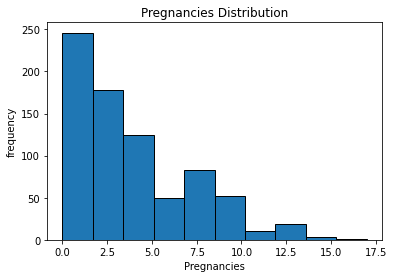

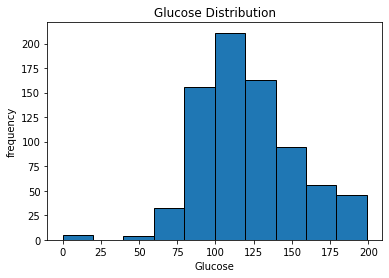

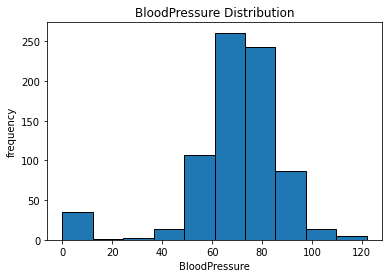

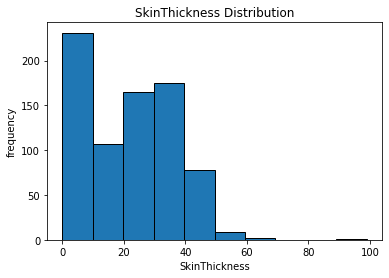

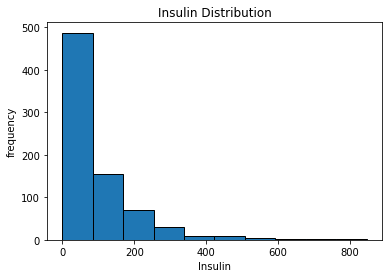

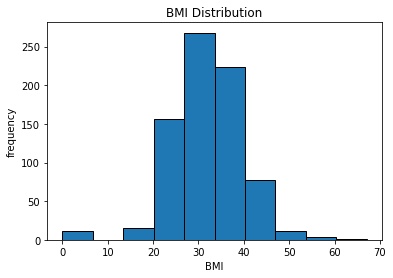

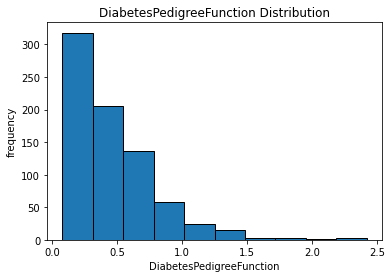

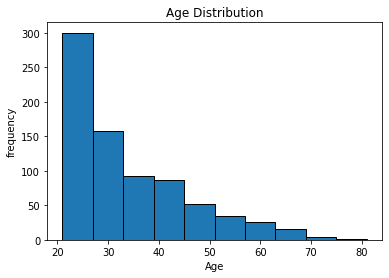

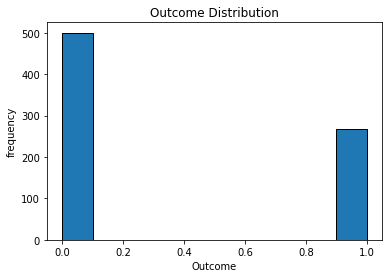

In [316]:
for col in data.columns:
    plt.hist(data[col],edgecolor='black')

    plt.title(col+ " Distribution")
    plt.xlabel(col)
    plt.ylabel('frequency')

    plt.show()

In [317]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


***As we can see there are many readings where glucose, skin thickness, insulin and BMI are 0. That is not possible. It means there are outliers present in the data. The decision tree algorithm is susceptible to outliers***

***Pregnancy column also contains outliers as we can see maximum value is 17. Number of pregnancies beyond 5-7 is inhuman.***

***Almost all the columns are skewed. We need to try to bring the data into normal form.***

In [318]:
# Finding correlation between the features
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


***The primary factors which play a major role in Diabetes diagnosis are number of pregnancies, blood glucose level,insulin, BMI, DiabetesPedigreeFunction and age of the patient***

***Blood pressure and skin thickness don't help much in prediction of diabetes. Hence, I would remove those features***

In [319]:
data.drop(['BloodPressure','SkinThickness'],axis=1,inplace=True)
data.sample(5)

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
693,7,129,125,38.5,0.439,43,1
718,1,108,178,35.5,0.415,24,0
380,1,107,82,30.8,0.821,24,0
228,4,197,744,36.7,2.329,31,0
595,0,188,185,32.0,0.682,22,1


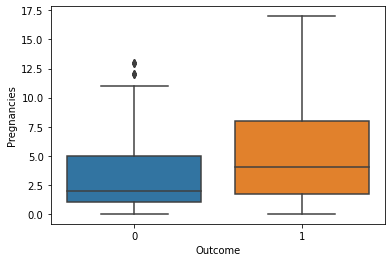

In [320]:
# Outliers in Pregnancies column

sns.boxplot(data['Outcome'],y=data['Pregnancies']);

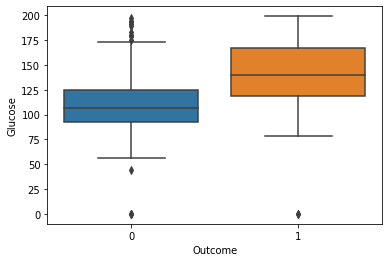

In [321]:
# Outliers in glucose levels
sns.boxplot(data['Outcome'],y=data['Glucose']);

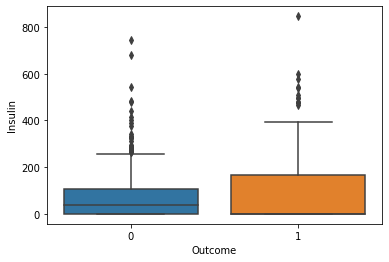

In [322]:
# Outliers in Insulin levels

sns.boxplot(data['Outcome'],y=data['Insulin']);

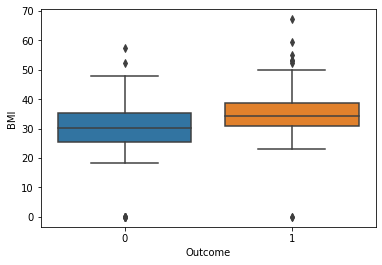

In [323]:
# Outliers in BMI

sns.boxplot(data['Outcome'],y=data['BMI']);

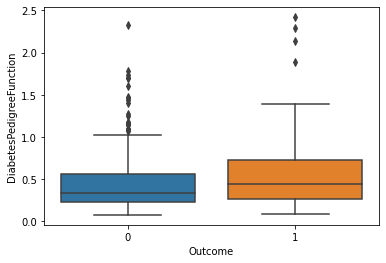

In [324]:
# Outliers in Age

sns.boxplot(data['Outcome'],y=data['DiabetesPedigreeFunction']);

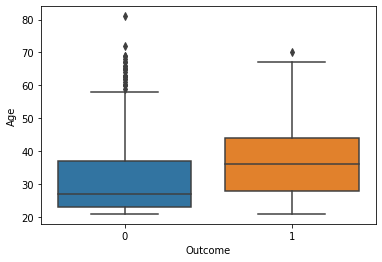

In [325]:
# Outliers in Age

sns.boxplot(data['Outcome'],y=data['Age']);

***We need to deal with outliers in columns like Pregnancies, Glucose, Insulin, BMI, DiabetesPedigreeFunction and Age***

## Outlier Detection 

### Dealing with outliers in Pregnancies column

In [326]:
p25_preg = data['Pregnancies'].quantile(0.25)
p75_preg = data['Pregnancies'].quantile(0.75)
iqr_preg = p75_preg - p25_preg
# We dont want calculated upper range. We know that pregnancies more than 7 or 8 is inhuman.
upper_preg = p75_preg + 0.5 * iqr_preg
lower_preg = p25_preg - 1.5 * iqr_preg

In [327]:
data[data['Pregnancies']>upper_preg]

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115,0,35.3,0.134,29,0
11,10,168,0,38.0,0.537,34,1
12,10,139,0,27.1,1.441,57,0
23,9,119,0,29.0,0.263,29,1
24,11,143,146,36.6,0.254,51,1
...,...,...,...,...,...,...,...
744,13,153,140,40.6,1.174,39,0
745,12,100,105,30.0,0.488,46,0
761,9,170,0,44.0,0.403,43,1
762,9,89,0,22.5,0.142,33,0


In [328]:
data[data['Pregnancies']<lower_preg]

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


***Since data in other columns of these outliers seem right, we won't trimm the data. Instead, we will cap them***

#### Capping the data in Pregnancies column

In [329]:
data['Pregnancies'] = np.where(data['Pregnancies']>upper_preg, upper_preg, data['Pregnancies'])

# Check if there are any outliers
data[data['Pregnancies']>upper_preg]

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


### Dealing with outliers in Glucose column

In [330]:
p25_glu = data['Glucose'].quantile(0.25)
p75_glu = data['Glucose'].quantile(0.75)
iqr_glu = p75_glu - p25_glu
upper_glu = p75_glu + 1.5 * iqr_glu
lower_glu = p25_glu - 1.5 * iqr_glu

In [331]:
data[data['Glucose']>upper_glu]

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [332]:
data[data['Glucose']<lower_glu]

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1.0,0,0,24.7,0.140,22,0
182,1.0,0,23,27.7,0.299,21,0
342,1.0,0,0,32.0,0.389,22,0
349,5.0,0,0,41.0,0.346,37,1
502,6.0,0,0,39.0,0.727,41,1


***This is a noisy/obsolete data. We should trim it***

In [333]:
data = data[data['Glucose']>lower_glu]
data.shape

(763, 7)

### Dealing with outliers in Insulin column

In [334]:
p25_in = data['Insulin'].quantile(0.25)
p75_in = data['Insulin'].quantile(0.75)
iqr_in = p75_in - p25_in
upper_in = p75_in + 1.5 * iqr_in
lower_in = p25_in - 1.5 * iqr_in

In [335]:
print(data[data['Insulin']>upper_in].shape)
data[data['Insulin']>upper_in]

(33, 7)


,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
8,2.0,197,543,30.5,0.158,53,1
13,1.0,189,846,30.1,0.398,59,1
54,7.0,150,342,34.7,0.718,42,0
111,8.0,155,495,34.0,0.543,46,1
139,5.0,105,325,36.9,0.159,28,0
153,1.0,153,485,40.6,0.687,23,0
186,8.0,181,495,30.1,0.615,60,1
220,0.0,177,478,34.6,1.072,21,1
228,4.0,197,744,36.7,2.329,31,0
231,6.0,134,370,46.2,0.238,46,1


In [336]:
print(data[data['Insulin']<lower_in].shape)
data[data['Insulin']<lower_in]

(0, 7)


,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


***Since there are 33 outliers. It's obvious that we will cap them***

In [337]:
data['Insulin'] = np.where(data['Insulin']>upper_in, upper_in, data['Insulin'])
print(data.shape)
# Check if there are any outliers
data[data['Insulin']>upper_in]

(763, 7)


,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


## Dealing with outliers in BMI column

In [338]:
upper_bmi = 55
lower_bmi = 15

In [339]:
print(data[data['BMI']>upper_bmi].shape)
data[data['BMI']>upper_bmi]

(3, 7)


,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
177,0.0,129,130.0,67.1,0.319,26,1
445,0.0,180,14.0,59.4,2.420,25,1
673,3.0,123,240.0,57.3,0.880,22,0


In [340]:
print(data[data['BMI']<lower_bmi].shape)
data[data['BMI']<lower_bmi]

(11, 7)


,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8.0,125,0.0,0.0,0.232,54,1
49,7.0,105,0.0,0.0,0.305,24,0
60,2.0,84,0.0,0.0,0.304,21,0
81,2.0,74,0.0,0.0,0.102,22,0
145,0.0,102,0.0,0.0,0.572,21,0
371,0.0,118,89.0,0.0,1.731,21,0
426,0.0,94,0.0,0.0,0.256,25,0
494,3.0,80,0.0,0.0,0.174,22,0
522,6.0,114,0.0,0.0,0.189,26,0
684,5.0,136,0.0,0.0,0.640,69,0


***BMI has almost 14 outliers and we will remove them***

In [341]:
data = data[data['BMI']>lower_bmi]
data.shape

(752, 7)

In [342]:
data = data[data['BMI']<upper_bmi]
data.shape

(748, 7)

### Dealing with outliers in DiabetesPedigreeFunction column

In [343]:
p25_dpf = data['DiabetesPedigreeFunction'].quantile(0.25)
p75_dpf = data['DiabetesPedigreeFunction'].quantile(0.75)
iqr_dpf = p75_dpf - p25_dpf
upper_dpf = p75_dpf + 1.5 * iqr_dpf
lower_dpf = p25_dpf - 1.5 * iqr_dpf

In [344]:
print(data[data['DiabetesPedigreeFunction']>upper_dpf].shape)
data[data['DiabetesPedigreeFunction']>upper_dpf]

(27, 7)


,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
4,0.0,137,168.00,43.1,2.288,33,1
12,8.5,139,0.00,27.1,1.441,57,0
39,4.0,111,207.00,37.1,1.390,56,1
45,0.0,180,0.00,42.0,1.893,25,1
58,0.0,146,0.00,40.5,1.781,44,0
100,1.0,163,0.00,39.0,1.222,33,1
147,2.0,106,119.00,30.5,1.400,34,0
187,1.0,128,58.00,32.0,1.321,33,1
218,5.0,85,0.00,29.0,1.224,32,1
228,4.0,197,321.25,36.7,2.329,31,0


In [345]:
print(data[data['DiabetesPedigreeFunction']<lower_dpf].shape)
data[data['DiabetesPedigreeFunction']<lower_dpf]

(0, 7)


,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


***Since there are 29 outliers. It's obvious that we will cap them***

In [346]:
data['DiabetesPedigreeFunction'] = np.where(data['DiabetesPedigreeFunction']>upper_dpf, upper_dpf, data['DiabetesPedigreeFunction'])
print(data.shape)
# Check if there are any outliers
data[data['DiabetesPedigreeFunction']>upper_dpf]

(748, 7)


,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


### Dealing with outliers in Age column

In [347]:
p25_age = data['Age'].quantile(0.25)
p75_age = data['Age'].quantile(0.75)
iqr_age = p75_age - p25_age
upper_age = p75_age + 1.5 * iqr_age
lower_age = p25_age - 1.5 * iqr_age

In [348]:
print(data[data['Age']>upper_age].shape)
data[data['Age']>upper_age]

(8, 7)


,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
123,5.0,132,0.0,26.8,0.186,69,0
363,4.0,146,0.0,38.5,0.520,67,1
453,2.0,119,0.0,19.6,0.832,72,0
459,8.5,134,60.0,25.9,0.460,81,0
489,8.0,194,0.0,26.1,0.551,67,0
537,0.0,57,0.0,21.7,0.735,67,0
666,4.0,145,0.0,32.5,0.235,70,1
674,8.0,91,0.0,35.6,0.587,68,0


In [349]:
print(data[data['Age']<lower_age].shape)
data[data['Age']<lower_age]

(0, 7)


,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


In [350]:
data['Age'] = np.where(data['Age']>upper_age, upper_age, data['Age'])
print(data.shape)
# Check if there are any outliers
data[data['Age']>upper_age]

(748, 7)


,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


## Distribution of data post outlier detection 

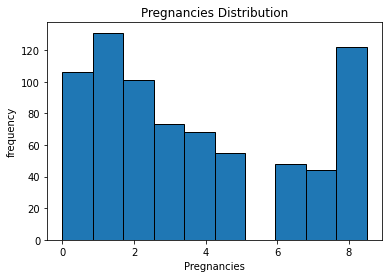

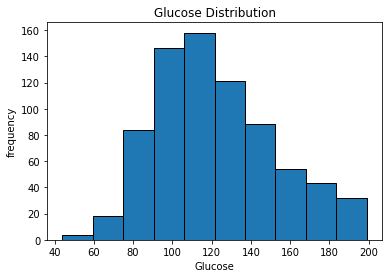

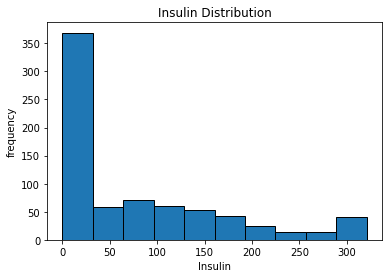

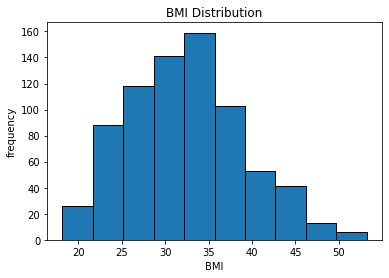

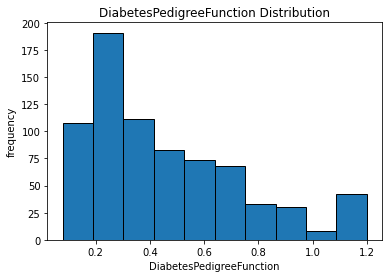

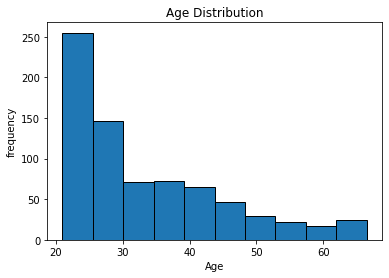

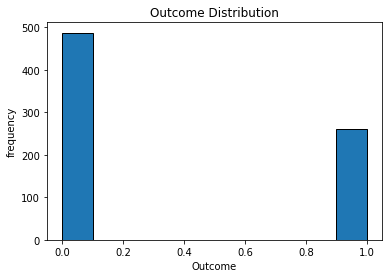

In [351]:
for col in data.columns:
    plt.hist(data[col],edgecolor='black')

    plt.title(col+ " Distribution")
    plt.xlabel(col)
    plt.ylabel('frequency')

    plt.show()

***Change in stats of the data:***

In [352]:
data.describe()

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000,748.000000
mean,3.627674,121.898396,74.968249,32.308957,0.459111,33.319519,0.348930
std,2.882007,30.583051,94.375169,6.645318,0.284684,11.597825,0.476951
min,0.000000,44.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,0.000000,27.475000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,37.500000,32.250000,0.375500,29.000000,0.000000
75%,6.000000,141.000000,130.000000,36.525000,0.626250,41.000000,1.000000
max,8.500000,199.000000,321.250000,53.200000,1.200000,66.500000,1.000000


## Exploratory Data Analysis

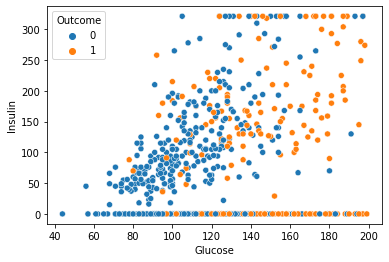

In [353]:
sns.scatterplot(data['Glucose'],data['Insulin'],hue=data['Outcome']);

***Many instances in Insuline data are wrong. There has been mistake in taking survey. Some having insulin as 0 and on the other hand some having insulin 300+***


In [354]:
def murammat(df):
    
    df_noisy1 = df[df['Insulin'] == 0]
    df_noisy1.drop(['Insulin'],axis=1,inplace=True)
    df = df[df['Insulin'] > 0]
    df_noisy2 = df[df['Insulin'] >= 300]
    df_noisy2.drop(['Insulin'],axis=1,inplace=True)
    df = df[df['Insulin'] < 300]
    y = df.Insulin.values
    df.drop(['Insulin'],axis=1,inplace=True)
    X=df.values
    sc_X = StandardScaler()
    X=sc_X.fit_transform(X)
    regressor = LinearRegression()
    regressor.fit(X,y)
    repaired1=regressor.predict(sc_X.transform(df_noisy1.values))
    df_noisy1['Insulin'] = repaired1
    repaired2=regressor.predict(sc_X.transform(df_noisy2.values))
    df_noisy2['Insulin'] = repaired2
    df_repaired = df_noisy1.append(df_noisy2)
    df_repaired =df_repaired[['Pregnancies', 'Glucose', 'Insulin', 'BMI', 'DiabetesPedigreeFunction',
       'Age', 'Outcome']]

    return df_repaired


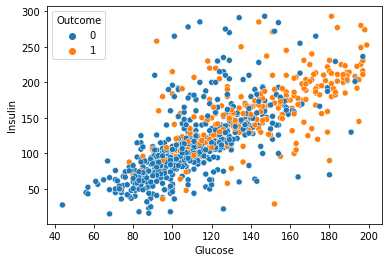

In [355]:
data_repaired=murammat(data)
data = data[data['Insulin'] > 0]
data = data[data['Insulin'] < 300]
data = data.append(data_repaired)
sns.scatterplot(data['Glucose'],data['Insulin'],hue=data['Outcome']);

## Distribution of data post EDA

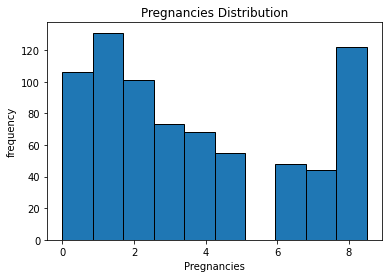

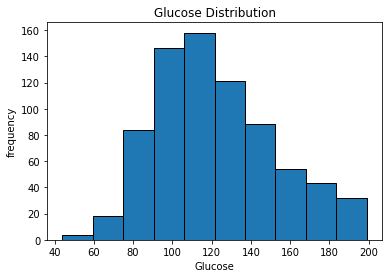

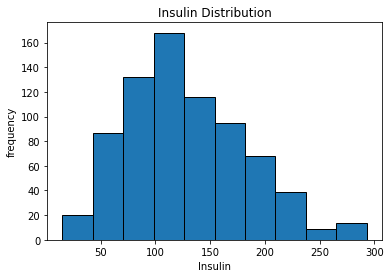

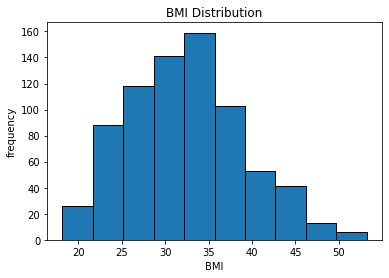

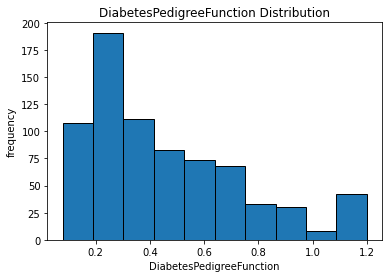

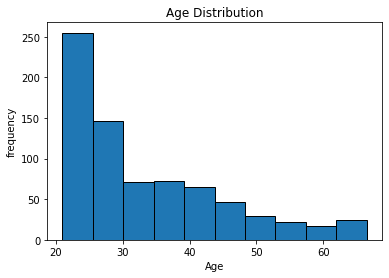

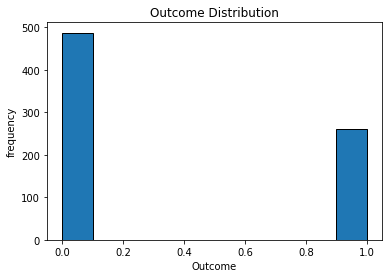

In [356]:
for col in data.columns:
    plt.hist(data[col],edgecolor='black')

    plt.title(col+ " Distribution")
    plt.xlabel(col)
    plt.ylabel('frequency')

    plt.show()

In [357]:
data.shape

(748, 7)

## Choice of algorithm

- Random Forest

***Since Random Forest Classifier algorithm is susceptible to variations in frequency distribution of categories, we need to feed equal number of Diabetic as well as non-diabetic patients data into the algorithm***

In [358]:
data

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1.0,89,94.000000,28.1,0.167,21.0,0
4,0.0,137,168.000000,43.1,1.200,33.0,1
6,3.0,78,88.000000,31.0,0.248,26.0,1
14,5.0,166,175.000000,25.8,0.587,51.0,1
16,0.0,118,230.000000,45.8,0.551,31.0,1
...,...,...,...,...,...,...,...
695,7.0,142,140.118114,30.4,0.128,43.0,1
707,2.0,127,129.345692,34.4,0.176,22.0,0
710,3.0,158,160.959944,31.2,0.295,24.0,0
715,7.0,187,211.048957,33.9,0.826,34.0,1


In [359]:
df=data[data.Outcome == 1]

In [360]:
data[data.Outcome == 0].shape

(487, 7)

In [361]:
dataset=data[data.Outcome == 0].sample(261)
dataset.shape

(261, 7)

In [362]:
dataset=dataset.append(df)
dataset.shape

(522, 7)

In [363]:
dataset=dataset.sample(frac=1).reset_index(drop=True)
dataset

,Pregnancies,Glucose,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,8.0,181,198.167898,30.1,0.615,60.0,1
1,0.0,119,120.195584,32.4,0.141,24.0,1
2,8.0,108,116.618888,30.5,0.955,33.0,1
3,0.0,152,272.000000,41.5,0.270,27.0,0
4,5.0,139,140.000000,28.6,0.411,26.0,0
...,...,...,...,...,...,...,...
517,3.0,83,18.000000,34.3,0.336,25.0,0
518,8.0,99,105.050655,35.4,0.388,50.0,0
519,2.0,88,53.000000,29.0,0.229,22.0,0
520,6.0,165,168.000000,33.6,0.631,49.0,0


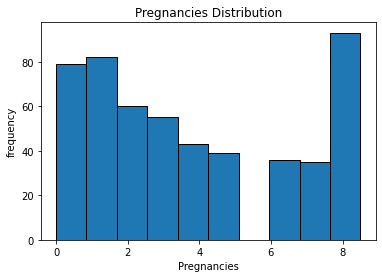

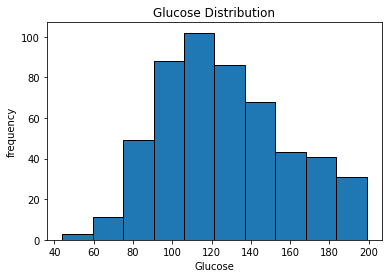

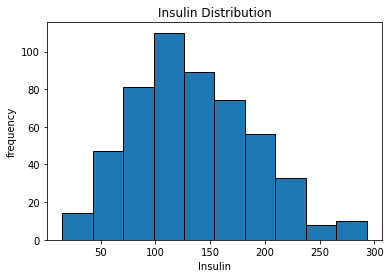

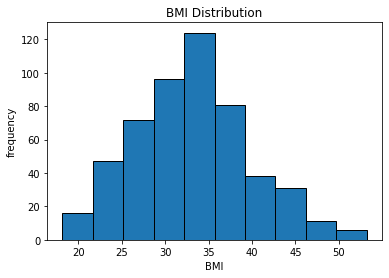

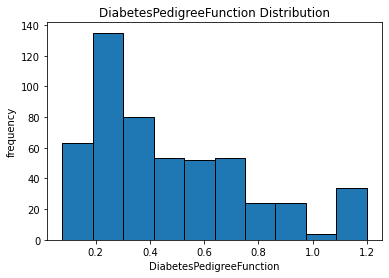

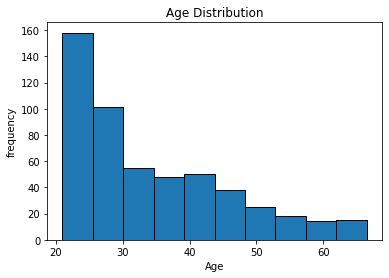

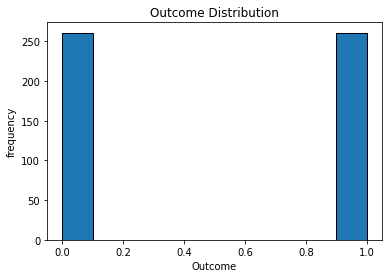

In [364]:
for col in dataset.columns:
    plt.hist(dataset[col],edgecolor='black')

    plt.title(col+ " Distribution")
    plt.xlabel(col)
    plt.ylabel('frequency')

    plt.show()

In [365]:
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

## Building deployment ready, secure pipeline

In [366]:
rf1 = RandomForestClassifier(n_estimators=50, criterion='gini',max_depth=4)
diabetes_diagnosis = Pipeline([
    ('rf1',rf1)
])

In [367]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [368]:
diabetes_diagnosis.fit(X_train,y_train)

Pipeline(steps=[('rf1', RandomForestClassifier(max_depth=4, n_estimators=50))])

In [369]:
y_pred=diabetes_diagnosis.predict(X_test)

In [370]:
y_pred

array([0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0])

In [371]:
accuracy_score(y_test,y_pred)

0.8

In [372]:
recall_score(y_test,y_pred)

0.8846153846153846

We have chosen **max_depth = 4** and **n_estimators= 50** because we want pretty high accuracy, **BUT** since we are dealing with **Diabetes Prediction**, we want even higher Recall. 
*We have to face the curse of precision-recall tradeoff*. We can't afford wrong prediction (False Negative) of a **Diabetic** patient